## CIT3720 - Assignment 3


#### Fall 2024

Name - Marlond Augustin

<font color='lightblue'>Please copy this assignment to your Google Drive and populate the Google Colab notebook with your answers. Please hand in the .ipynb file in Moodle </font>

In assignment, we will download a housing dataset from Boston and execute python to create a Linear regression model.

You will be graded on your answers to the assignment questions, but to receive full credit you must use python to filter & manipulate the dataframe to help you answer the question. Please populate the code block associated with each question. For answers that require longer explanation, please include your answers in a python code block. See below.

```python
list_len = [ .. ]
print(f"There are {len(list_len)} items in the list")
"""
Here I can provide longer answer if required

"""

```

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called
`Orange_Telecom_Churn_Data.csv`.



In [1]:
"""
Download Housing Dataset from GitHub and save it as a dataframe
"""
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("https://raw.githubusercontent.com/rafalbielech/CIT3720/main/Data/WestRoxbury.csv")
shape = df.shape
print(f"The downloaded dataframe is {shape[0]} by {shape[1]}")

The downloaded dataframe is 5802 by 14


## Question 1

* In this dataset, we are pretty lucky because only one attribute is considered a categorical value. Perform one-hot encoder for the categorical column and drop the original column from the resulting dataframe.
* Save the dataframe to df_cleaned

## Hint -
* Please reference previous assignment


In [2]:
"""
Answer - Question 1
"""
mask = df.dtypes == object
categorical_cols = df.columns[mask]
"""
num_ohc_cols = (df[categorical_cols]
                .apply(lambda x:x.nunique())
                .sort_values(ascending=False))
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]
small_num_ohc_cols -=1
small_num_ohc_cols.sum()
"""
#'REMODEL'
df_cleaned = df.drop(columns=categorical_cols)
df_cleaned

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0


## Question 2

* Do we have any outliers in the numerical column? How do you know? Please write python code to validate if we have outliers or not and remove any outliers that may exist. Work off of df_cleaned

## Hint
* We reviewed code that would allow us to drop outliers based on IQR. Let's reuse that to drop outliers from all columns rather than one. We can iterate over all the column using a for loop
```
Q1 = df_cleaned['TAX'].quantile(0.25)
Q3 = df_cleaned['TAX'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_cleaned[(df_cleaned['TAX'] < Q1 - threshold * IQR) | (df_cleaned['TAX'] > Q3 + threshold * IQR)]
df_cleaned = df_cleaned.drop(outliers.index)

```


In [3]:
"""
Answer - Question 2
"""
#Since I cannot remove both data types at the same time I split it in two
fields = df_cleaned.dtypes == int
categorical_cols = df_cleaned.columns[fields]
#categorical_cols contains the name of each int datatypes
for field in categorical_cols:
  Q1 = df_cleaned[field].quantile(0.25)
  Q3 = df_cleaned[field].quantile(0.75)
  IQR = Q3 - Q1
  threshold = 1.5
  outliers = df_cleaned[(df_cleaned[field] < Q1 - threshold * IQR) | (df_cleaned[field] > Q3 + threshold * IQR)]
  #I print out the different outliers
  #print(field)
  #print(outliers)
  df_cleaned = df_cleaned.drop(outliers.index)

#This is for removing the outliers for the float type
fields = df_cleaned.dtypes == float
categorical_cols = df_cleaned.columns[fields]
for field in categorical_cols:
  Q1 = df_cleaned[field].quantile(0.25)
  Q3 = df_cleaned[field].quantile(0.75)
  IQR = Q3 - Q1
  threshold = 1.5
  outliers = df_cleaned[(df_cleaned[field] < Q1 - threshold * IQR) | (df_cleaned[field] > Q3 + threshold * IQR)]
  #I print out the different outliers
  #print(field)
  #print(outliers)
  df_cleaned = df_cleaned.drop(outliers.index)
df_cleaned

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
0,344.200,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0
5,337.400,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1
6,359.400,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0
7,320.400,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0
8,333.500,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,371.200,4669,6116,1950,2522,1440,2.0,8,3,1,1,1,1
5796,413.414,5200,9150,1950,2324,1326,2.0,7,3,1,1,1,1
5798,407.900,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1
5799,406.500,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1


## Question 3

* In our dataset, we are interested in predicting TOTAL VALUE column, this is going to be our Y that we are looking to predict. Everything else will be our independent variable.
* Should we be using all of the variables in our prediction set? Perform a feature selection to identify list of features that are going to be most impactful for our prediction.

## Hint -

* One way to perform feature selection is backward selection, below you will find some example code that you might need to retrofit to your solution

```
import statsmodels.api as sm
import pandas as pd

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
```

In [4]:
"""
Answer - Question 3
"""
import statsmodels.api as sm
import pandas as pd

# Backward Elimination
y = df_cleaned['TOTAL VALUE ']
X = df_cleaned.drop('TOTAL VALUE ', axis=1)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()

    p = pd.Series(model.pvalues.values[0:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
X_1

['TAX', 'BEDROOMS ', 'FULL BATH', 'KITCHEN']


,TAX,BEDROOMS,FULL BATH,KITCHEN
0,4330,3,1,1
5,4244,3,1,1
6,4521,3,1,1
7,4030,3,1,1
8,4195,3,1,1
...,...,...,...,...
5794,4669,3,1,1
5796,5200,3,1,1
5798,5131,3,1,1
5799,5113,3,1,1


# Question 4

* Now that we have our list of most impactful features, split the dataset into a training and testing dataset. We can use 70% of the data for training and 30% of the data for validation.
* After, create a linear regression model that will be used to predict our TOTAL VALUE column.
* Evaluate the performance of your model using any evaluation technique.

In [5]:
"""
Answer - Question 4
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#selecting the most impactful features
X_data = df_cleaned[selected_features_BE]

#splitting the dataset
train_X, test_X, train_y, test_y = train_test_split(X_data, y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=42)

# making a linear progression
LR = LinearRegression()

error_df = list()

LR = LR.fit(train_X, train_y)
y_train_pred = LR.predict(train_X)
y_test_pred = LR.predict(test_X)

error_df.append(pd.Series({'train': mean_squared_error(train_y, y_train_pred),
                           'test': mean_squared_error(test_y, y_test_pred)},
                           name='no enc'))
error_df = pd.concat(error_df, axis=1)
error_df
print(train_y)
print(test_y)


2260    396.5
865     313.0
211     348.9
5002    414.4
4940    379.7
        ...  
4443    347.5
2830    364.0
2954    300.8
3502    398.5
2195    478.9
Name: TOTAL VALUE , Length: 1608, dtype: float64
2791    346.1
5799    406.5
473     284.0
3113    343.9
669     293.3
        ...  
848     353.1
1426    275.0
2456    400.6
1759    408.6
4914    404.5
Name: TOTAL VALUE , Length: 690, dtype: float64


[Text(0.5, 0, 'Ground truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Boston, Massachusets House Price Predictions vs Truth')]

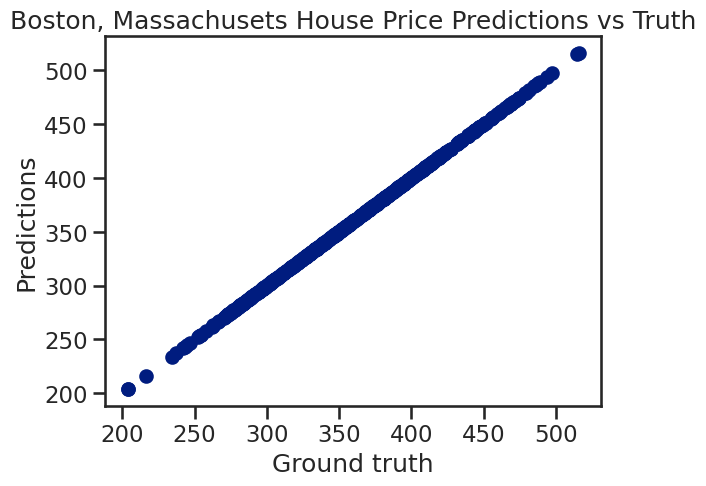

In [6]:
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(test_y, y_test_pred)

ax.set(xlabel='Ground truth', ylabel='Predictions',title='Boston, Massachusets House Price Predictions vs Truth')
